In [1]:
import sys
import os


project_root = "C:/Users/Visnu/DIAMONDS"  


if project_root not in sys.path:
    sys.path.append(project_root)


from diamonds import set_data_path, load_patients
import diamonds.data as dt


In [2]:
from diamonds import set_data_path, load_patients
import diamonds.data as dt
import os


data_path = "C:/Users/Visnu/OneDrive - Danmarks Tekniske Universitet/DIAMONDS - Preclinical_new"


set_data_path(data_path)

print("Dataset Path:", data_path)
print("Contents:", os.listdir(data_path)) 



Dataset Path: C:/Users/Visnu/OneDrive - Danmarks Tekniske Universitet/DIAMONDS - Preclinical_new
Contents: ['desktop.ini', 'p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16']


In [3]:
import diamonds.data as dt
import pandas as pd
import diamonds.io.io as dio

def filtered_patient_list():
    return [
        item for item in os.listdir(data_path)
        if os.path.isdir(os.path.join(data_path, item)) and not item.lower().endswith(".ini")
    ]


dio.get_patient_list = filtered_patient_list

ptt = load_patients(show_progress=True)
pt = ptt[5]




Loading patients: 100%|██████████| 15/15 [00:03<00:00,  4.99patient(s)/s]


In [4]:
import numpy as np
session_type = dt.SeatedSession  
session = pt[session_type]
        
        
EMG, ECG = pt[session_type, dt.EMG].decompose()
ecg_signal = -ECG.samples[:, 1]  
fs = ECG.fs
t2 = np.arange(0, len(ecg_signal)) / fs
print(ecg_signal)
print(type(ecg_signal))
print(np.shape(ecg_signal))

C:\Users/Visnu/DIAMONDS\diamonds\signal_processing\decomposition\Unet.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path,

[ 78.00601841 101.65445813 115.05994577 ...  13.95875393   7.64462522
   2.40681721]
<class 'numpy.ndarray'>
(490000,)


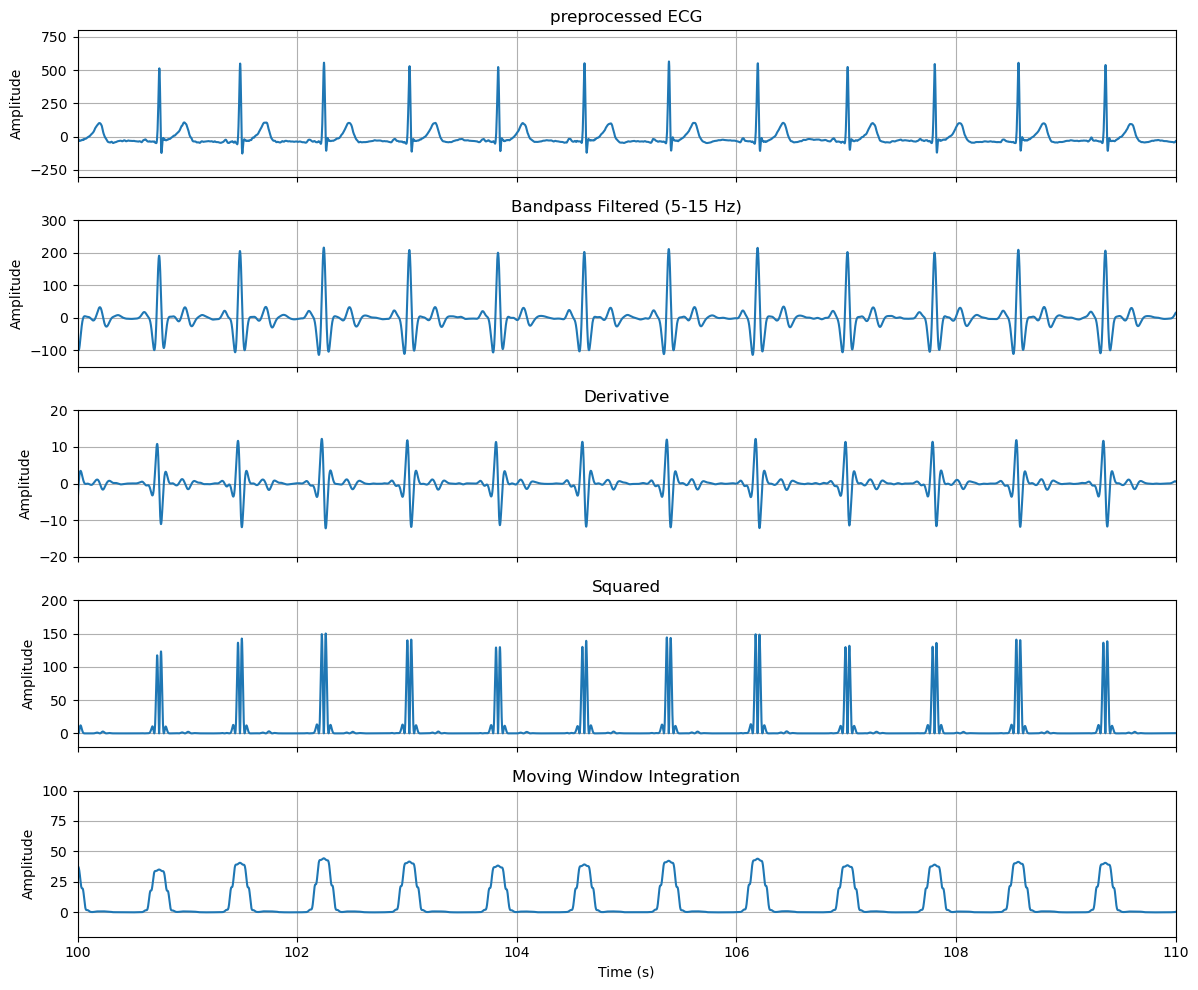

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pan_tompkins
importlib.reload(pan_tompkins)
from pan_tompkins import PanTompkins, HeartRate

def plot_pan_tompkins_steps(ecg_signal, fs, title_prefix=''):
    pan = PanTompkins(ecg_signal, fs)
    bandpassed = pan.bandpass_filter()
    derivative = pan.derivative_filter()
    squared = pan.squaring()
    integrated = pan.moving_window_integration()

    time = np.arange(len(ecg_signal)) / fs

    fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

    axes[0].plot(time, ecg_signal)
    axes[0].set_title(f"{title_prefix}preprocessed ECG")
    axes[0].set_xlim(100, 120)
    axes[0].set_ylim(-300, 800)  # Adjusted y-limit for Raw ECG

    
    axes[1].plot(time, bandpassed)
    axes[1].set_title("Bandpass Filtered (5-15 Hz)")
    axes[1].set_ylim(-150, 300)  # Adjusted y-limit for Bandpass Filter
    
    axes[2].plot(time, derivative)
    axes[2].set_title("Derivative")
    axes[2].set_ylim(-20, 20)  # Adjusted y-limit for Derivative
    
    axes[3].plot(time, squared)
    axes[3].set_title("Squared")
    axes[3].set_xlim(100, 110)
    axes[3].set_ylim(-20, 200)  # Adjusted y-limit for Squared Signal
    
    axes[4].plot(time, integrated)
    axes[4].set_title("Moving Window Integration")
    axes[4].set_ylim(-20, 100)  # Adjusted y-limit for Integration
    
    for ax in axes:
        ax.grid(True)
        ax.set_ylabel("Amplitude")
        
    axes[-1].set_xlabel("Time (s)")

    plt.tight_layout()
    plt.show()

# Example call to function
plot_pan_tompkins_steps(ecg_signal, fs)




=== mitdb: processing 15 / 48 records ===


mitdb:   0%|          | 0/15 [00:00<?, ?it/s]

mitdb:   7%|▋         | 1/15 [00:10<02:25, 10.37s/it]

Detected 2272 R-peaks


mitdb:  13%|█▎        | 2/15 [00:18<02:01,  9.31s/it]

Detected 1867 R-peaks


mitdb:  20%|██        | 3/15 [00:27<01:49,  9.15s/it]

Detected 2187 R-peaks


mitdb:  27%|██▋       | 4/15 [00:36<01:37,  8.87s/it]

Detected 2084 R-peaks


mitdb:  33%|███▎      | 5/15 [00:45<01:28,  8.86s/it]

Detected 1567 R-peaks


mitdb:  40%|████      | 6/15 [00:53<01:18,  8.78s/it]

Detected 2698 R-peaks


mitdb:  47%|████▋     | 7/15 [01:02<01:11,  8.88s/it]

Detected 2028 R-peaks


mitdb:  53%|█████▎    | 8/15 [01:12<01:03,  9.04s/it]

Detected 2145 R-peaks


mitdb:  60%|██████    | 9/15 [01:21<00:54,  9.05s/it]

Detected 1974 R-peaks


mitdb:  67%|██████▋   | 10/15 [01:29<00:43,  8.78s/it]

Detected 2527 R-peaks


mitdb:  73%|███████▎  | 11/15 [01:37<00:34,  8.66s/it]

Detected 2135 R-peaks


mitdb:  80%|████████  | 12/15 [01:46<00:25,  8.60s/it]

Detected 2539 R-peaks


mitdb:  87%|████████▋ | 13/15 [01:54<00:16,  8.49s/it]

Detected 1795 R-peaks


mitdb:  93%|█████████▎| 14/15 [02:03<00:08,  8.47s/it]

Detected 1892 R-peaks


mitdb: 100%|██████████| 15/15 [02:11<00:00,  8.75s/it]


Detected 1953 R-peaks

=== stdb: processing 15 / 28 records ===


stdb:   7%|▋         | 1/15 [00:06<01:37,  6.98s/it]

Detected 2562 R-peaks


stdb:  13%|█▎        | 2/15 [00:15<01:43,  7.93s/it]

Detected 2499 R-peaks


stdb:  20%|██        | 3/15 [00:22<01:28,  7.36s/it]

Detected 2120 R-peaks


stdb:  27%|██▋       | 4/15 [00:30<01:25,  7.80s/it]

Detected 3007 R-peaks


stdb:  33%|███▎      | 5/15 [00:38<01:18,  7.80s/it]

Detected 1852 R-peaks


stdb:  40%|████      | 6/15 [00:42<00:59,  6.65s/it]

Detected 1507 R-peaks
Detected 6528 R-peaks


stdb:  53%|█████▎    | 8/15 [01:10<01:10, 10.14s/it]

Detected 2480 R-peaks
Detected 2374 R-peaks


stdb:  60%|██████    | 9/15 [01:18<00:55,  9.33s/it]

Detected 5150 R-peaks


stdb:  73%|███████▎  | 11/15 [01:34<00:33,  8.37s/it]

Detected 2410 R-peaks
Detected 3011 R-peaks


stdb:  87%|████████▋ | 13/15 [01:50<00:16,  8.11s/it]

Detected 2352 R-peaks


stdb:  93%|█████████▎| 14/15 [01:54<00:06,  6.93s/it]

Detected 2703 R-peaks


stdb: 100%|██████████| 15/15 [01:58<00:00,  7.92s/it]


Detected 2126 R-peaks

=== nstdb: processing 15 / 15 records ===


nstdb:   7%|▋         | 1/15 [00:09<02:18,  9.88s/it]

Detected 2990 R-peaks


nstdb:  13%|█▎        | 2/15 [00:18<01:55,  8.86s/it]

Detected 2714 R-peaks


nstdb:  20%|██        | 3/15 [00:25<01:39,  8.33s/it]

Detected 2358 R-peaks


nstdb:  27%|██▋       | 4/15 [00:33<01:29,  8.15s/it]

Detected 2285 R-peaks


nstdb:  33%|███▎      | 5/15 [00:41<01:20,  8.04s/it]

Detected 2287 R-peaks
Detected 2849 R-peaks


nstdb:  47%|████▋     | 7/15 [01:02<01:16,  9.58s/it]

Detected 2796 R-peaks


nstdb:  53%|█████▎    | 8/15 [01:11<01:05,  9.35s/it]

Detected 2583 R-peaks


nstdb:  60%|██████    | 9/15 [01:21<00:57,  9.56s/it]

Detected 2105 R-peaks


nstdb:  67%|██████▋   | 10/15 [01:30<00:47,  9.41s/it]

Detected 1995 R-peaks


nstdb:  73%|███████▎  | 11/15 [01:39<00:36,  9.10s/it]

Detected 1990 R-peaks
Detected 2579 R-peaks


nstdb:  87%|████████▋ | 13/15 [01:56<00:17,  8.69s/it]

⚠️  nstdb/bw skipped: 404 Error: Not Found for url: https://physionet.org/files/nstdb/1.0.0/bw.atr


nstdb:  93%|█████████▎| 14/15 [02:03<00:08,  8.12s/it]

⚠️  nstdb/em skipped: 404 Error: Not Found for url: https://physionet.org/files/nstdb/1.0.0/em.atr


nstdb: 100%|██████████| 15/15 [02:10<00:00,  8.70s/it]

⚠️  nstdb/ma skipped: 404 Error: Not Found for url: https://physionet.org/files/nstdb/1.0.0/ma.atr



➡️  Saved 42 rows to 'C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/ecg_eval_results_new_new.xlsx'
Detected 2272 R-peaks


C:\Users\visnu\AppData\Local\Temp\ipykernel_39372\3122199381.py:162: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DB', y='F1', data=df, ci=None)


Detected 2272 R-peaks
✅ All visualizations generated and saved.

📊 Per-Database Validation Summary:
Database  Precision   Recall  F1 Score  Avg. TP    Avg. FP    Avg. FN  Avg. Runtime (s)
   mitdb   0.973400 0.954533  0.962133   2056.6  54.266667 100.800000          8.753333
   nstdb   0.815750 0.890167  0.848167   1958.0 502.916667 239.500000          9.135833
    stdb   0.940333 0.951533  0.945133   2746.8  98.600000  58.933333          7.919333

✅ Summary also saved to: C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/ecg_validation_summary_by_db.csv


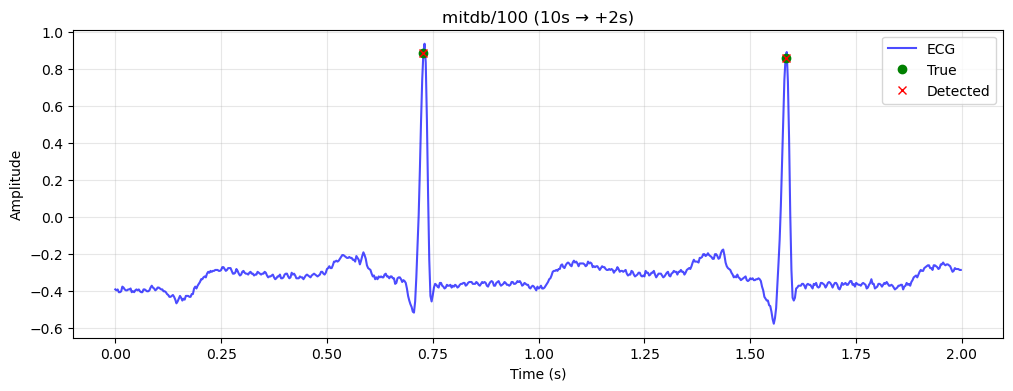

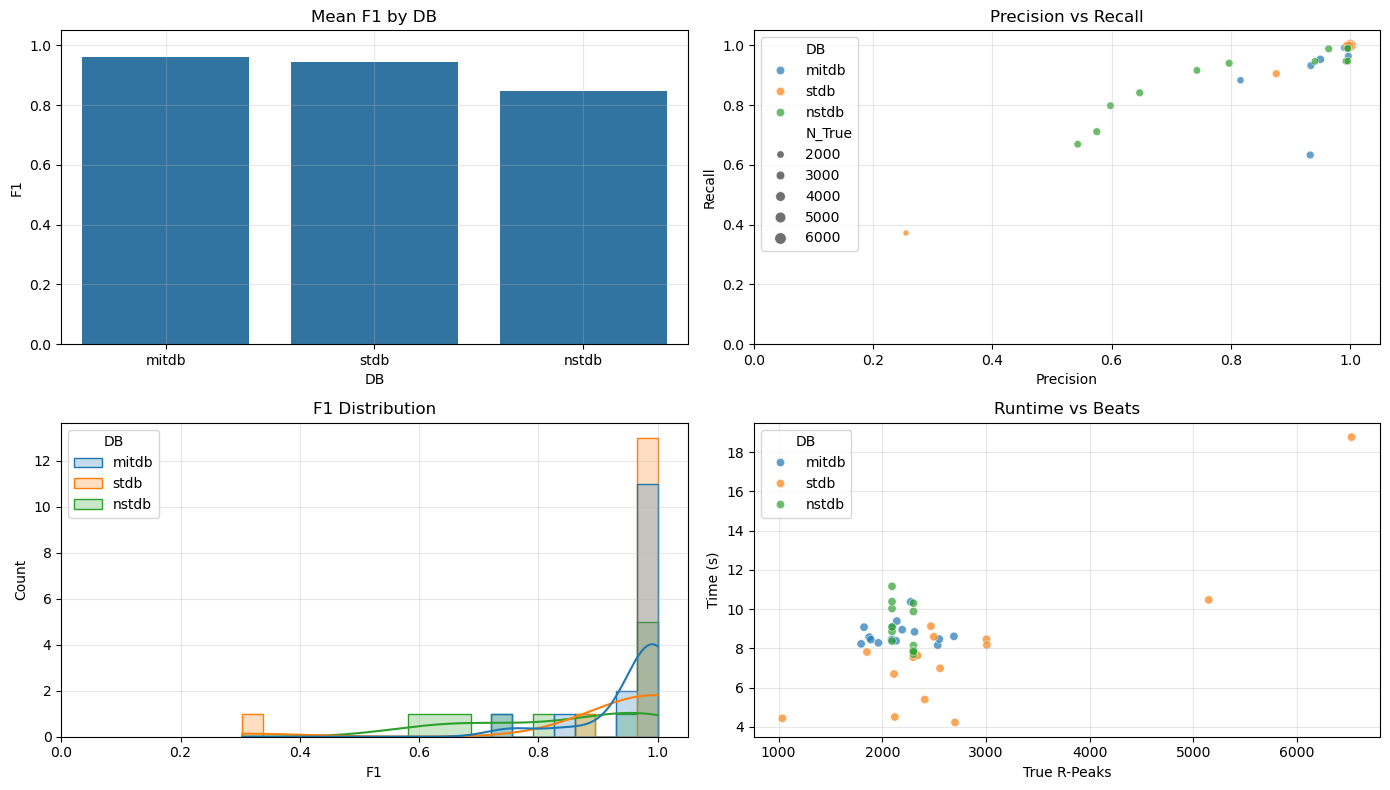

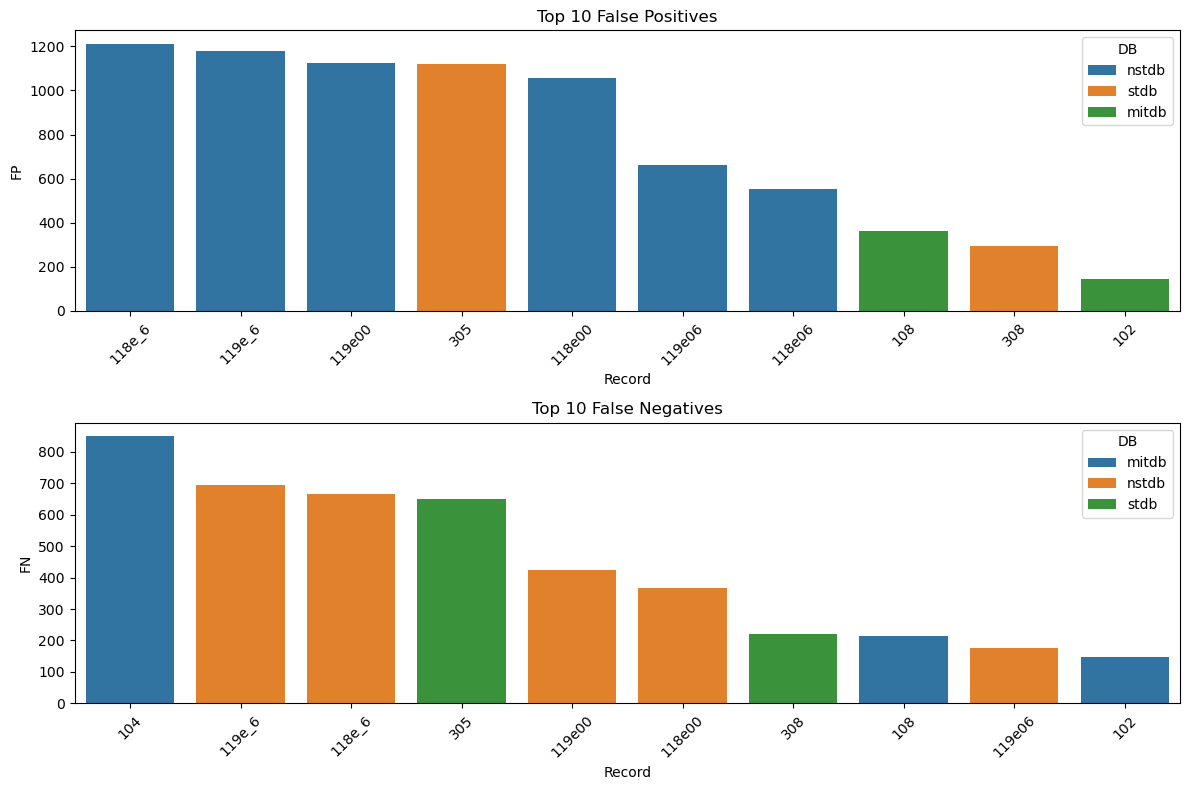

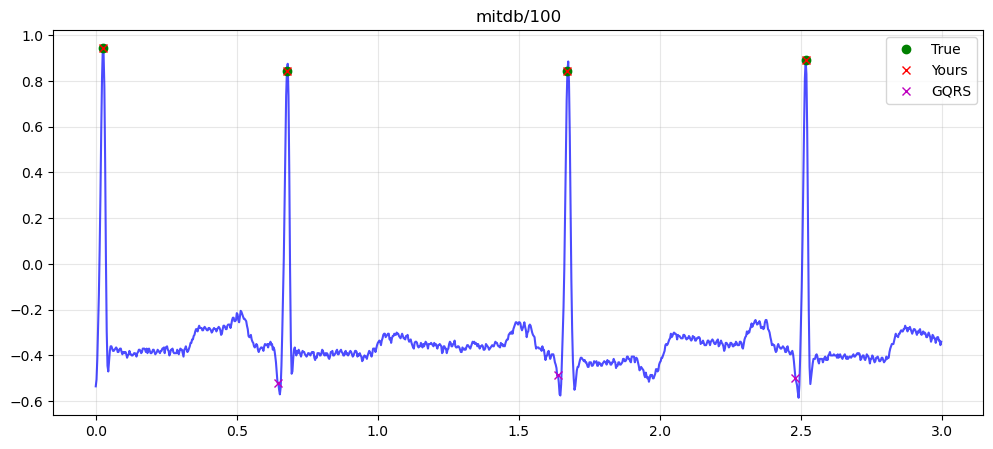

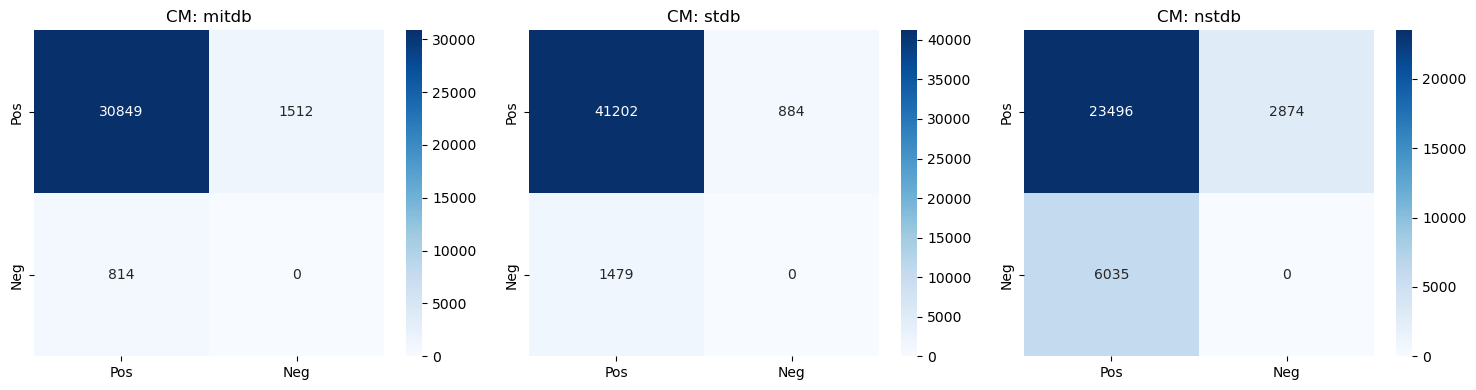

In [ ]:
import os
import time
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm

from wfdb.processing import gqrs_detect
import importlib
import pan_tompkins
importlib.reload(pan_tompkins)
from pan_tompkins import detect_ecg_peaks  


def match_peaks(detected, reference, tolerance=0.05, fs=360):
    tol = int(tolerance * fs)
    matched, used = [], set()
    for p in detected:
        for d in range(-tol, tol + 1):
            if (p + d) in reference and (p + d) not in used:
                matched.append(p)
                used.add(p + d)
                break
    tp = len(matched)
    fn = len(reference) - tp
    fp = len(detected)  - tp
    return tp, fp, fn


database_records = {
    'mitdb':   [str(r) for r in (
                  list(range(100,110)) + list(range(111,120)) +
                  [121,122,123,124,200,201,202,203,205,207,208,209,210,
                   212,213,214,215,217,219,220,221,222,223,228,
                   230,231,232,233,234])],
    'stdb':    [str(r) for r in range(300,328)],
    'nstdb':   ['118e00','118e06','118e12','118e18','118e24','118e_6',
                '119e00','119e06','119e12','119e18','119e24','119e_6',
                'bw','em','ma']
}
annotator_mapping = {
    'mitdb':    'atr',
    'stdb':     'atr',
    'nstdb':    'atr'
}


dbs_to_process = ['mitdb','stdb','nstdb']
samples_per_db = 15  

all_results = []

for db in dbs_to_process:
    recs      = database_records[db]
    annotator = annotator_mapping[db]
    print(f"\n=== {db}: processing {min(len(recs), samples_per_db)} / {len(recs)} records ===")
    for rec in tqdm(recs[:samples_per_db], desc=db):
        start = time.time()
        try:
          
            record = wfdb.rdrecord(rec, pn_dir=db)
            ann    = wfdb.rdann  (rec, annotator, pn_dir=db)

          
            sig = record.p_signal
            if sig.ndim > 1:
                names = [n.lower() for n in record.sig_name]
                if 'ii'   in names: ch = names.index('ii')
                elif 'mlii'in names: ch = names.index('mlii')
                elif 'ecg' in names: ch = names.index('ecg')
                else:                ch = 0
                ecg = sig[:,ch]
            else:
                ecg = sig.flatten()

            fs         = record.fs
            true_peaks = ann.sample
            detected   = detect_ecg_peaks(ecg, fs)

            tp, fp, fn = match_peaks(detected, true_peaks, fs=fs)
            prec = tp/(tp+fp) if (tp+fp) else 0
            rec_ = tp/(tp+fn) if (tp+fn) else 0
            f1   = 2*prec*rec_/(prec+rec_) if (prec+rec_) else 0
 
            elapsed = time.time() - start
            all_results.append({
                'DB':            db,
                'Record':        rec,
                'FS':            fs,
                'N_True':        len(true_peaks),
                'N_Det':         len(detected),
                'TP':            tp,
                'FP':            fp,
                'FN':            fn,
                'Precision':     round(prec,3),
                'Recall':        round(rec_,3),
                'F1':            round(f1,3),
                'ProcessTime_s': round(elapsed,2),
            })

        except Exception as e:
            print(f"⚠️  {db}/{rec} skipped: {e}")
            continue


results_df = pd.DataFrame(all_results)
excel_path = 'C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/ecg_eval_results_new_new.xlsx'
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    results_df.to_excel(writer, index=False, sheet_name='Results')
print(f"\n➡️  Saved {len(results_df)} rows to '{excel_path}'")




def plot_ecg_peaks(db, rec, window_seconds=5, offset_seconds=0):
    record = wfdb.rdrecord(rec, pn_dir=db)
    ann    = wfdb.rdann  (rec, annotator_mapping[db], pn_dir=db)
    sig    = record.p_signal
    if sig.ndim>1:
        names=[n.lower() for n in record.sig_name]
        ch = names.index('ii') if 'ii' in names else \
             names.index('mlii') if 'mlii' in names else \
             names.index('ecg') if 'ecg' in names else 0
        ecg = sig[:,ch]
    else:
        ecg = sig.flatten()
    fs = record.fs
    true_p  = ann.sample
    det_p   = detect_ecg_peaks(ecg, fs)

    start = int(offset_seconds*fs)
    end   = min(start + int(window_seconds*fs), len(ecg))
    seg   = ecg[start:end]
    t     = np.arange(len(seg))/fs

    t_true = [(p-start)/fs for p in true_p  if start<=p<end]
    t_det  = [(p-start)/fs for p in det_p   if start<=p<end]

    plt.figure(figsize=(12,4))
    plt.plot(t, seg, 'b-', alpha=0.7, label='ECG')
    plt.plot(t_true, [seg[int(x*fs)] for x in t_true], 'go', label='True')
    plt.plot(t_det,  [seg[int(x*fs)] for x in t_det],  'rx', label='Detected')
    plt.title(f"{db}/{rec} ({offset_seconds}s → +{window_seconds}s)")
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.legend(); plt.grid(alpha=0.3)
    return plt.gcf()

def plot_performance_summary(df):
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    sns.barplot(x='DB', y='F1', data=df, ci=None)
    plt.ylim(0,1.05); plt.title("Mean F1 by DB"); plt.grid(alpha=0.3)
    plt.subplot(2,2,2)
    sns.scatterplot(x='Precision',y='Recall',hue='DB',size='N_True',
                    data=df,alpha=0.7)
    plt.xlim(0,1.05); plt.ylim(0,1.05); plt.title("Precision vs Recall")
    plt.grid(alpha=0.3)
    plt.subplot(2,2,3)
    sns.histplot(df, x='F1', hue='DB', kde=True, element='step')
    plt.xlim(0,1.05); plt.title("F1 Distribution"); plt.grid(alpha=0.3)
    plt.subplot(2,2,4)
    sns.scatterplot(x='N_True', y='ProcessTime_s', hue='DB', data=df, alpha=0.7)
    plt.title("Runtime vs Beats"); plt.xlabel("True R-Peaks"); plt.ylabel("Time (s)")
    plt.grid(alpha=0.3); plt.tight_layout()
    return plt.gcf()

def plot_error_analysis(df):
    fig, axes = plt.subplots(2,1,figsize=(12,8))
    top_fp = df.nlargest(10,'FP')
    sns.barplot(x='Record',y='FP',hue='DB',data=top_fp,ax=axes[0])
    axes[0].set_title("Top 10 False Positives"); axes[0].tick_params(axis='x',rotation=45)
    top_fn = df.nlargest(10,'FN')
    sns.barplot(x='Record',y='FN',hue='DB',data=top_fn,ax=axes[1])
    axes[1].set_title("Top 10 False Negatives"); axes[1].tick_params(axis='x',rotation=45)
    plt.tight_layout(); return fig

def compare_detectors(db, rec, window_seconds=5, offset_seconds=0):
    record = wfdb.rdrecord(rec, pn_dir=db)
    ann    = wfdb.rdann  (rec, annotator_mapping[db], pn_dir=db)
    sig    = record.p_signal
    
    if sig.ndim>1:
        names=[n.lower() for n in record.sig_name]
        ch = names.index('ii') if 'ii' in names else 0
        ecg = sig[:,ch]
    else:
        ecg = sig.flatten()
    fs = record.fs

    start = int(offset_seconds*fs)
    end   = min(start+int(window_seconds*fs), len(ecg))
    seg   = ecg[start:end]
    t     = np.arange(len(seg))/fs

    true_p = [p-start for p in ann.sample if start<=p<end]
    yours  = [p-start for p in detect_ecg_peaks(ecg,fs) if start<=p<end]
    gqrs_p = [p-start for p in gqrs_detect(ecg,fs)  if start<=p<end]

    plt.figure(figsize=(12,5))
    plt.plot(t, seg, 'b-', alpha=0.7)
    plt.plot(np.array(true_p)/fs,  seg[true_p],  'go', label='True')
    plt.plot(np.array(yours)/fs,   seg[yours],   'rx', label='Yours')
    plt.plot(np.array(gqrs_p)/fs,  seg[gqrs_p],  'mx', label='GQRS')
    plt.title(f"{db}/{rec}"); plt.legend(); plt.grid(alpha=0.3)
    return plt.gcf()

def plot_confusion_heatmaps(df):
    db_list = df['DB'].unique()
    fig, axes = plt.subplots(1, len(db_list), figsize=(5*len(db_list),4))
    if len(db_list)==1: axes=[axes]
    for ax,db in zip(axes, db_list):
        d = df[df['DB']==db]
        tp, fp, fn = d['TP'].sum(), d['FP'].sum(), d['FN'].sum()
        cm = np.array([[tp,fn],[fp,0]])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Pos','Neg'], yticklabels=['Pos','Neg'], ax=ax)
        ax.set_title(f"CM: {db}")
    plt.tight_layout(); return fig


fig1 = plot_ecg_peaks('mitdb','100',window_seconds=2,offset_seconds=10)

fig2 = plot_performance_summary(results_df)

fig3 = plot_error_analysis(results_df)

fig4 = compare_detectors('mitdb','100',window_seconds=3,offset_seconds=5)

fig5 = plot_confusion_heatmaps(results_df)


print("All visualizations generated and saved.")


db_summary = results_df.groupby('DB').agg({
    'Precision': 'mean',
    'Recall': 'mean',
    'F1': 'mean',
    'TP': 'mean',
    'FP': 'mean',
    'FN': 'mean',
    'ProcessTime_s': 'mean'
}).reset_index()


db_summary.columns = [
    'Database', 'Precision', 'Recall', 'F1 Score',
    'Avg. TP', 'Avg. FP', 'Avg. FN', 'Avg. Runtime (s)'
]


print("\n📊 Per-Database Validation Summary:")
print(db_summary.to_string(index=False))


db_summary_path = 'C:/Users/visnu/DIAMONDS/Thesis code/Datafiles/ecg_validation_summary_by_db.csv'
db_summary.to_csv(db_summary_path, index=False)
print(f"\n✅ Summary also saved to: {db_summary_path}")


